# Big mart sales
## Importing and reading training data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
tr1= pd.read_csv("C:\\Users\\HP\\Downloads\\train_big.csv")
tr1.drop("Item_Identifier",axis=1,inplace=True)
tr1.drop("Outlet_Identifier",axis=1,inplace=True)
#tr1.drop("Outlet_Establishment_Year",axis=1,inplace=True)
corrmat=tr1.corr()
print(tr1.head())

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998         NaN               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket

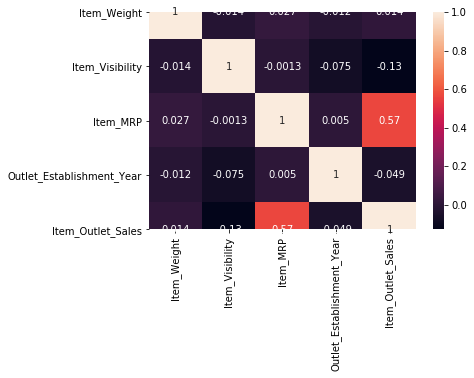

In [46]:
#Checking Correlation
sns.heatmap(tr1.corr(),annot=True)

## Filling outlet

In [47]:
tr1['Outlet_Size'].fillna('Medium',inplace=True)
print(tr1['Outlet_Size'].value_counts())
tr1.head()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## Coding char var


In [48]:
from sklearn import preprocessing


l=['Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Location_Type','Outlet_Type']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(tr1[i])
    print(i,label_encoder.classes_)
    
    tr1[i]=label_encoder.transform(tr1[i])
    
tr1.head()

Item_Fat_Content ['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
Outlet_Size ['High' 'Medium' 'Small']
Item_Type ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
Outlet_Location_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [49]:
print(np.mean(tr1['Outlet_Size']))
print(np.mean(tr1['Item_Weight']))

1.1708318667135984
12.857645184136183


In [50]:
tr1=tr1.fillna(np.mean(tr1))

In [51]:
x_tr=tr1[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
y_tr=tr1[['Item_Outlet_Sales']]
x_tr.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,1998,1,2,0
4,8.93,1,0.000000,9,53.8614,1987,0,2,1


In [52]:
# Creating decision tree classifier object
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor( max_depth=3)
clf

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [53]:
#train decision tree classifier
clf=clf.fit(x_tr, y_tr)
clf

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Importing testing dataset

In [54]:
ts1= pd.read_csv("C:\\Users\\HP\\Downloads\\test_big.csv")


In [55]:
#Filling Outlet size by medium
ts1['Outlet_Size'].fillna('Medium',inplace=True)
print(ts1['Outlet_Size'].value_counts())
ts1.head()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [56]:
from sklearn import preprocessing


l=['Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Location_Type','Outlet_Type']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(ts1[i])
    print(i, label_encoder.classes_)
    ts1[i]=label_encoder.transform(ts1[i])
    
ts1.head()
    

Item_Fat_Content ['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
Outlet_Size ['High' 'Medium' 'Small']
Item_Type ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
Outlet_Location_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,1,1,1
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,1,2,0
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,1,1,1
4,FDY38,NaN,2,0.118599,4,234.2300,OUT027,1985,1,2,3


In [57]:
print(np.mean(ts1['Outlet_Size']))
print(np.mean(ts1['Item_Weight']))

1.17092061256821
12.695633368756374


In [58]:
ts1=ts1.fillna(np.mean(ts1))

In [59]:
x_ts=ts1[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]


In [60]:
y_pred=clf.predict(x_ts)
print(y_pred)
y_pred.shape

[1852.03410824 1852.03410824  542.9755396  ... 1852.03410824 3153.27273078
 1852.03410824]


(5681,)

## Generating and submitting CSV File:

In [66]:
tr1_test1=pd.read_csv("C:\\Users\\HP\\Downloads\\test_big.csv")
Item_Identifier=pd.DataFrame(tr1_test1['Item_Identifier'])

Outlet_Identifier=pd.DataFrame(tr1_test1['Outlet_Identifier'])
print(Item_Identifier.shape)
print(Outlet_Identifier.shape)

y_pred.shape

(5681, 1)
(5681, 1)


(5681,)

In [72]:
submission=pd.concat([Item_Identifier,Outlet_Identifier,Item_Outlet_Sales],axis=1)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1852.034108
1,FDW14,OUT017,1852.034108
2,NCN55,OUT010,542.975540
3,FDQ58,OUT017,3153.272731
4,FDY38,OUT027,5041.821497


In [71]:
submission.to_csv('submission_decision1.csv')